# Transfer Learning With Tensorflow and Keras



<img src = "https://ruder.io/content/images/2017/03/andrew_ng_drivers_ml_success-1.png" width = 400>

**Hola Amigos!**

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

In this Notebook, We will cover two different ways to utilize a pretrained network



*   Feature Extraction
*   Finetuning





## Downloading the Cats vs Dogs Dataset

The dogs vs cats dataset refers to a dataset used for a Kaggle machine learning competition held in 2013. The dataset is comprised of photos of dogs and cats provided as a subset of photos from a much larger dataset of 3 million manually annotated photos. The dataset was developed as a partnership between Petfinder.com and Microsoft.

In this notebook, we use the compressed version of the cats vs dogs dataset. The download link can be found here: https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip 

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg" width=300>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2020-09-11 09:52:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   157MB/s    in 0.4s    

2020-09-11 09:52:59 (157 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

Creating Directories:

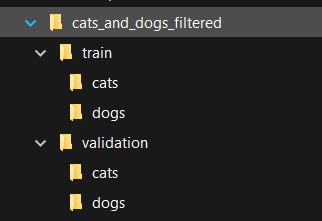

In [ ]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


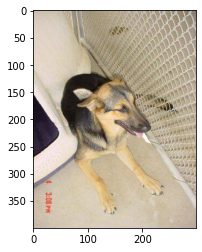

(299, 400)


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

for files in os.listdir(train_dogs_dir):
  img = Image.open(os.path.join(train_dogs_dir,files))
  plt.imshow(img)
  plt.show()
  print(img.size)
  break

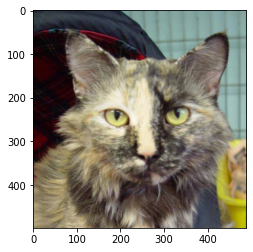

(489, 499)


In [ ]:
for files in os.listdir(train_cats_dir):
  img = Image.open(os.path.join(train_cats_dir,files))
  plt.imshow(img)
  plt.show()
  print(img.size)
  break

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class. This class allows you to:

*   configure random transformations and normalization operations to be done on your image data during training
*   instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs, fit_generator, evaluate_generator and predict_generator and fit.



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
  )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
  )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Image Batch Shape: (64, 150, 150, 3)
Label Batch Shape: (64,)


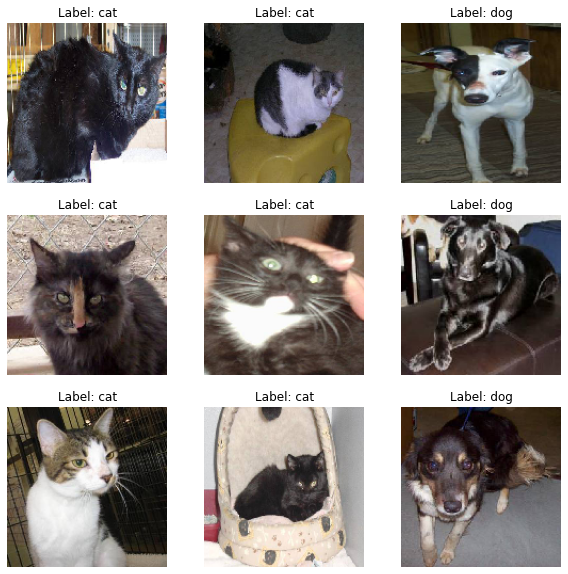

In [ ]:
import matplotlib.pyplot as plt

index_to_class = {0:"cat",1:"dog"}
plt.figure(figsize=(10, 10))
for imagebatch, labelbatch in train_generator:
  print("Image Batch Shape: " + str(imagebatch.shape))
  print("Label Batch Shape: " + str(labelbatch.shape))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(imagebatch[i])
    plt.title("Label: " + index_to_class[labelbatch[i]])
    plt.axis("off")
  break

## **Training a ConvNet from Scratch**

4 Conv2D-MaxPool Blocks Followed by a Classifier Head

**CONV2D Layer :**

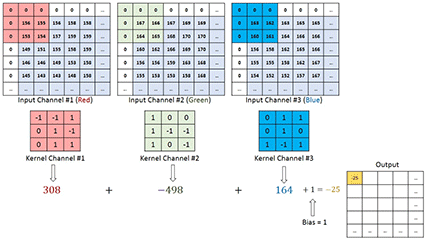


**MAXPOOLING Layer :**   
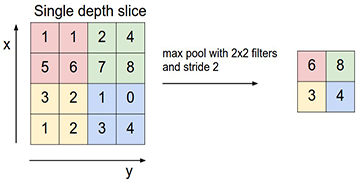

**MODEL :**  
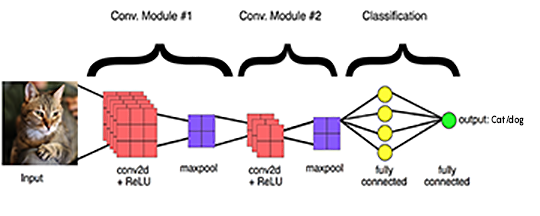

In [ ]:
# Fill out the number of filters and activation function in each of the Conv2D layers

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import models

model = models.Sequential()
model.add(Conv2D(, (3, 3), activation='', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(, (3, 3), activation=''))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(, (3, 3), activation=''))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(, (3, 3), activation=''))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
32/32 [==============================] - 9s 266ms/step - loss: 0.2593 - acc: 0.8995 - val_loss: 0.5760 - val_acc: 0.7380
Epoch 2/30
32/32 [==============================] - 8s 254ms/step - loss: 0.2380 - acc: 0.9100 - val_loss: 0.6346 - val_acc: 0.7240
Epoch 3/30
32/32 [==============================] - 8s 257ms/step - loss: 0.2372 - acc: 0.9080 - val_loss: 0.6068 - val_acc: 0.7310
Epoch 4/30
32/32 [==============================] - 8s 253ms/step - loss: 0.2322 - acc: 0.9105 - val_loss: 0.5762 - val_acc: 0.7450
Epoch 5/30
32/32 [==============================] - 8s 255ms/step - loss: 0.2116 - acc: 0.9305 - val_loss: 0.5910 - val_acc: 0.7550
Epoch 6/30
32/32 [==============================] - 8s 252ms/step - loss: 0.2141 - acc: 0.9185 - val_loss: 0.5889 - val_acc: 0.7420
Epoch 7/30
32/32 [==============================] - 8s 254ms/step - loss: 0.2000 - acc: 0.9260 - val_loss: 0.5811 - val_acc: 0.7440
Epoch 8/30
32/32 [==============================] - 8s 256ms/step - loss: 0.

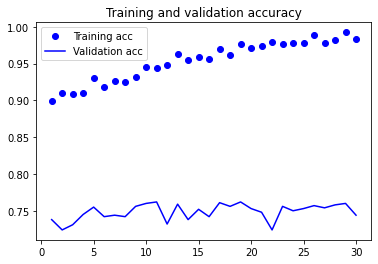

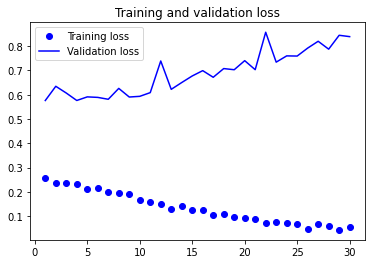

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## **Convnet with Data Augumentation + Dropout**

**DATA AUGMENTATION :** 

 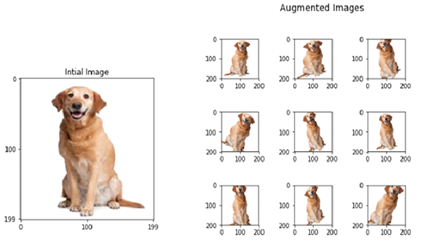


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

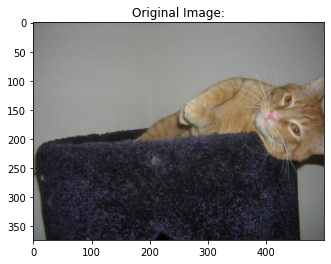

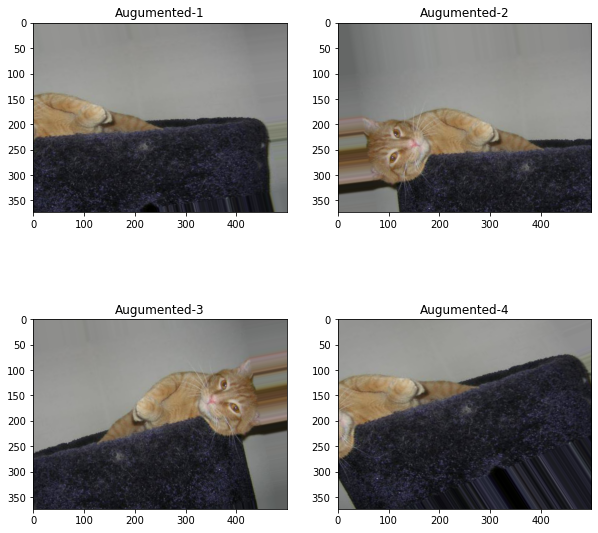

In [ ]:
from PIL import Image
import numpy as np

filename = os.listdir(train_cats_dir)[3]
img = Image.open(os.path.join(train_cats_dir, filename), )

plt.imshow(img)
plt.title("Original Image:")
plt.show()

img = np.array(img)
img = img.reshape((1,) + img.shape)

i = 0
plt.figure(figsize=(10, 10))
for batch in datagen.flow(img, batch_size=1):
  ax = plt.subplot(2, 2, i + 1)
  imgplot = plt.imshow(np.array(batch[0]).astype('uint8'))
  plt.title("Augumented-" + str(i+1))
  i += 1
  if i % 4 == 0:
    break

**Adding a Dropout Layer**     
  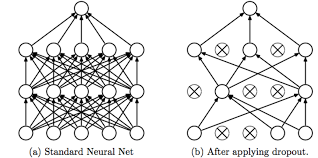

  Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import models

from tensorflow.keras import optimizers

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#Add the dropout layer here
#---------------------------
model.add()
#----------------------------
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, epochs = 30, validation_data=validation_generator)

Epoch 1/30
16/16 [==============================] - 16s 999ms/step - loss: 0.6993 - accuracy: 0.5135 - val_loss: 0.6883 - val_accuracy: 0.5030
Epoch 2/30
16/16 [==============================] - 16s 992ms/step - loss: 0.6894 - accuracy: 0.5380 - val_loss: 0.6816 - val_accuracy: 0.5020
Epoch 3/30
16/16 [==============================] - 16s 1s/step - loss: 0.6856 - accuracy: 0.5425 - val_loss: 0.6842 - val_accuracy: 0.5380
Epoch 4/30
16/16 [==============================] - 16s 1s/step - loss: 0.6769 - accuracy: 0.5770 - val_loss: 0.6654 - val_accuracy: 0.6040
Epoch 5/30
16/16 [==============================] - 16s 1s/step - loss: 0.6762 - accuracy: 0.5750 - val_loss: 0.6539 - val_accuracy: 0.6140
Epoch 6/30
16/16 [==============================] - 16s 984ms/step - loss: 0.6738 - accuracy: 0.5655 - val_loss: 0.6442 - val_accuracy: 0.6360
Epoch 7/30
16/16 [==============================] - 16s 977ms/step - loss: 0.6681 - accuracy: 0.5850 - val_loss: 0.6433 - val_accuracy: 0.6350
Epoch 8/

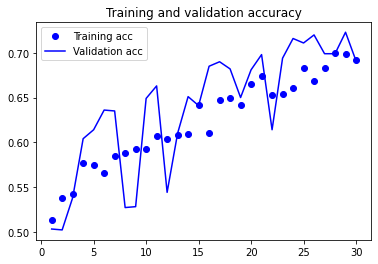

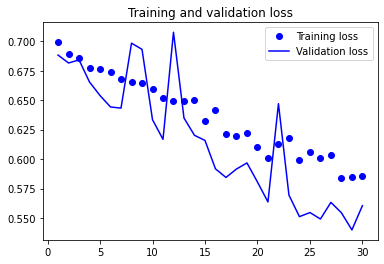

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Using a pretrained ConvNet

Use the representations learned by a previous network to extract meaningful features from new samples. You simply add a new classifier, which will be trained from scratch, on top of the pretrained model so that you can repurpose the feature maps learned previously for the dataset.

You do not need to (re)train the entire model. The base convolutional network already contains features that are generically useful for classifying pictures. However, the final, classification part of the pretrained model is specific to the original classification task, and subsequently specific to the set of classes on which the model was trained.

For more info: https://www.tensorflow.org/api_docs/python/tf/keras/applications

<img src = "https://www.learnopencv.com/wp-content/uploads/2019/05/transfer-learning-1024x574.jpg" width = 560>

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = models.Sequential()
# Use the convolution base of the loaded VGG16 here 
# ----------------------------------
model.add()
# ----------------------------------
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(model.trainable_weights)

30

In [ ]:
conv_base.trainable = False

In [ ]:
len(model.trainable_weights)

4

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
  )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
  )

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
16/16 [==============================] - 20s 1s/step - loss: 0.6590 - accuracy: 0.6165 - val_loss: 0.5702 - val_accuracy: 0.7340
Epoch 2/30
16/16 [==============================] - 17s 1s/step - loss: 0.5743 - accuracy: 0.7335 - val_loss: 0.5009 - val_accuracy: 0.7960
Epoch 3/30
16/16 [==============================] - 17s 1s/step - loss: 0.5308 - accuracy: 0.7725 - val_loss: 0.4481 - val_accuracy: 0.8190
Epoch 4/30
16/16 [==============================] - 17s 1s/step - loss: 0.4965 - accuracy: 0.7835 - val_loss: 0.4172 - val_accuracy: 0.8260
Epoch 5/30
16/16 [==============================] - 17s 1s/step - loss: 0.4749 - accuracy: 0.7975 - val_loss: 0.3895 - val_accuracy: 0.8310
Epoch 6/30
16/16 [==============================] - 17s 1s/step - loss: 0.4576 - accuracy: 0.7985 - val_loss: 0.3660 - val_accuracy: 0.8430
Epoch 7/30
16/16 [==============================] - 17s 1s/step - loss: 0.4317 - accuracy: 0.8295 - val_loss: 0.3490 - val_accuracy: 0.8540
Epoch 8/30
16/16 [==

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Finetuning the ConvNet

Unfreeze a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model. This allows us to "fine-tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task.

<img src = "https://miro.medium.com/max/5994/1*9t7Po_ZFsT5_lZj445c-Lw.png" width = 560>

The second strategy shown in the above figure is how we finetune the network.

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

In [ ]:
len(model.trainable_weights)

10

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
16/16 [==============================] - 23s 1s/step - loss: 0.3393 - acc: 0.8465 - val_loss: 0.2424 - val_acc: 0.8940
Epoch 2/30
16/16 [==============================] - 22s 1s/step - loss: 0.3069 - acc: 0.8655 - val_loss: 0.2433 - val_acc: 0.8920
Epoch 3/30
16/16 [==============================] - 22s 1s/step - loss: 0.2677 - acc: 0.8835 - val_loss: 0.2621 - val_acc: 0.8960
Epoch 4/30
16/16 [==============================] - 22s 1s/step - loss: 0.2692 - acc: 0.8810 - val_loss: 0.2224 - val_acc: 0.9020
Epoch 5/30
16/16 [==============================] - 22s 1s/step - loss: 0.2533 - acc: 0.8850 - val_loss: 0.2405 - val_acc: 0.9000
Epoch 6/30
16/16 [==============================] - 22s 1s/step - loss: 0.2587 - acc: 0.8890 - val_loss: 0.2113 - val_acc: 0.9210
Epoch 7/30
16/16 [==============================] - 22s 1s/step - loss: 0.2447 - acc: 0.8955 - val_loss: 0.2563 - val_acc: 0.9000
Epoch 8/30
16/16 [==============================] - 22s 1s/step - loss: 0.2351 - acc: 0.90

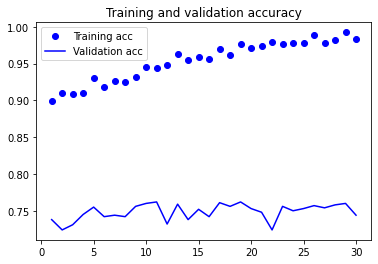

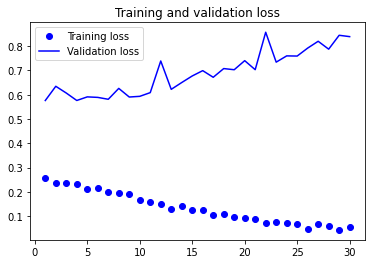

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)

8/8 [==============================] - 4s 441ms/step - loss: 0.2491 - acc: 0.9230


In [ ]:
for i, (images, label) in enumerate(validation_generator):
  val_loss, val_acc = model.evaluate(images, label, verbose=1)
  print("Validation Loss for batch {}: {}".format(i, val_loss))
  print("Validation Accuracy for batch {}: {}".format(i, val_acc))
  break

4/4 [==============================] - 0s 95ms/step - loss: 0.3248 - acc: 0.9297
Validation Loss for batch 0: 0.3247620463371277
Validation Accuracy for batch 0: 0.9296875
